In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv('./dataset_2024.csv')
data

,throw_id,team_id,fielder_id,fielder_position,thrower_id,thrower_position,receiver_id,receiver_position,exchange_time,throw_pos_x,...,bounce_velo_y,bounce_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,throw_deflected_by_receiver,start_state,end_state,runs_on_play,batter_result
0,3,11,400,6,400,6,63,3,1.533,-60.116123,...,-25.452504,7.330194,56.199323,60.187776,8.202015,0,____1,1___1,0,first
1,6,11,228,5,390,4,63,3,0.534,-0.562563,...,NaN,NaN,59.013134,65.657938,5.047566,0,1___1,1___2,0,first
2,7,8,415,4,415,4,143,3,1.266,1.598751,...,NaN,NaN,61.037489,64.429134,2.719261,0,123_1,____3,0,out
3,8,8,308,1,308,1,143,3,1.800,25.403185,...,NaN,NaN,63.142075,65.648720,2.069797,0,____1,____2,0,out
4,10,1,314,4,300,6,514,3,0.733,8.957441,...,NaN,NaN,59.770395,64.046058,3.890504,0,123_1,____3,0,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,33189,1,300,6,187,4,63,3,0.567,-0.706883,...,-32.706535,8.013511,61.579339,66.498556,3.523959,0,123_1,1_3_2,1,first
19996,33190,1,768,7,768,7,63,3,1.134,-72.726998,...,-30.850832,11.182392,60.859688,61.483396,3.518128,0,1___0,1___1,0,out
19997,33192,1,63,3,300,6,63,3,1.266,7.741671,...,NaN,NaN,59.986376,65.275522,4.002790,0,1___1,____3,0,out
19998,33193,15,713,4,713,4,313,3,1.200,65.300092,...,NaN,NaN,60.946962,64.565955,2.847538,0,____2,____3,0,out


### While often routine, an infielder making a timely and accurate throw to first base is a skill that is critical  to the outcome of a game. Arm strength, exchange time, velocity, and the first baseman’s ability to  receive an errant throw all determine whether or not an out is made on the play. We have attached a  dataset of throws to first base for you to analyze. We would like to see you build some sort of model  based on this data that evaluates the talent of a subset of infielders. We will be evaluating your  submission on four components of your output: 

1. Your modeling approach and creativity 
2. Your model evaluation process 
3. Your ability to perform a skill assessment of some group of players involved 
4. Your creation of a player-evaluation tool or other presentation layer that would be presented to  a less technical audience 


In [62]:
#Get my subset is step 1, I am going to select shortstop (position number 6)

shortstop = data[data['fielder_position'] == 6]

# I am not sure why there are throws to second base in this dataset? Presumably double-plays? I will remove them
print(shortstop['batter_result'].value_counts())

# I am going to remove the throws to second base
shortstop = shortstop[shortstop['batter_result'] != 'second']
print(shortstop['batter_result'].value_counts())


#Lets also make sure all throws to first base come from the shorstop
shortstop = shortstop[shortstop['thrower_position'] == 6]
shortstop

out       5612
first      685
second      36
Name: batter_result, dtype: int64
out      5612
first     685
Name: batter_result, dtype: int64


,throw_id,team_id,fielder_id,fielder_position,thrower_id,thrower_position,receiver_id,receiver_position,exchange_time,throw_pos_x,...,bounce_velo_y,bounce_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,throw_deflected_by_receiver,start_state,end_state,runs_on_play,batter_result
0,3,11,400,6,400,6,63,3,1.533,-60.116123,...,-25.452504,7.330194,56.199323,60.187776,8.202015,0,____1,1___1,0,first
10,20,1,300,6,300,6,514,3,0.767,-38.809328,...,NaN,NaN,59.852937,64.134195,3.818836,0,____2,____3,0,out
16,32,6,566,6,566,6,103,3,1.266,-28.876506,...,NaN,NaN,59.693178,63.091014,3.984381,0,____0,____1,0,out
17,34,6,566,6,566,6,103,3,1.200,-13.826274,...,NaN,NaN,60.387855,64.672500,3.411858,0,12__2,____3,0,out
18,37,12,337,6,337,6,536,3,1.100,-30.368299,...,NaN,NaN,61.038196,64.043788,2.632625,0,____0,____1,0,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,33166,13,688,6,688,6,194,3,1.333,-22.959293,...,NaN,NaN,61.672962,64.173875,2.037927,0,____0,____1,0,out
19983,33170,15,713,6,713,6,568,3,1.533,-20.586777,...,NaN,NaN,60.290488,64.216056,3.398369,0,____1,____2,0,out
19985,33173,1,300,6,300,6,514,3,0.666,-57.988672,...,NaN,NaN,59.839710,63.493134,3.802722,0,____1,____2,0,out
19986,33175,15,713,6,713,6,568,3,1.434,-66.791936,...,-22.129961,5.473131,59.548462,65.200102,4.378655,0,____2,1___2,0,first


In [63]:
# Get shortstops who have at least 15 throws to first base
shorstop_sample_counts = shortstop.groupby('thrower_id').count().sort_values('batter_result', ascending=False)['throw_id']
shortstop_ids = shorstop_sample_counts[shorstop_sample_counts > 15]

# Get the throws to first base for these shortstops
shortstop_sample = shortstop[shortstop['thrower_id'].isin(shortstop_ids.index)]
shortstop_sample

,throw_id,team_id,fielder_id,fielder_position,thrower_id,thrower_position,receiver_id,receiver_position,exchange_time,throw_pos_x,...,bounce_velo_y,bounce_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,throw_deflected_by_receiver,start_state,end_state,runs_on_play,batter_result
0,3,11,400,6,400,6,63,3,1.533,-60.116123,...,-25.452504,7.330194,56.199323,60.187776,8.202015,0,____1,1___1,0,first
10,20,1,300,6,300,6,514,3,0.767,-38.809328,...,NaN,NaN,59.852937,64.134195,3.818836,0,____2,____3,0,out
16,32,6,566,6,566,6,103,3,1.266,-28.876506,...,NaN,NaN,59.693178,63.091014,3.984381,0,____0,____1,0,out
17,34,6,566,6,566,6,103,3,1.200,-13.826274,...,NaN,NaN,60.387855,64.672500,3.411858,0,12__2,____3,0,out
18,37,12,337,6,337,6,536,3,1.100,-30.368299,...,NaN,NaN,61.038196,64.043788,2.632625,0,____0,____1,0,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,33157,2,162,6,162,6,695,3,1.500,-8.344595,...,NaN,NaN,60.530026,63.432938,3.116445,0,_2__2,____3,0,out
19979,33158,13,688,6,688,6,194,3,1.000,-74.204620,...,NaN,NaN,58.959909,65.401691,5.000453,0,____0,1___0,0,first
19981,33166,13,688,6,688,6,194,3,1.333,-22.959293,...,NaN,NaN,61.672962,64.173875,2.037927,0,____0,____1,0,out
19985,33173,1,300,6,300,6,514,3,0.666,-57.988672,...,NaN,NaN,59.839710,63.493134,3.802722,0,____1,____2,0,out


- Started by just cleaning up what data I am going to include so I removed any throws not to first base and any that did not come from shortstop

- Also went ahead and removed any players that had less than 15 throws because their sample size was too small. Kind of arbitrarily selected that number

### Evaluation Strategy

- Eliminate columns that are not representative of the shortstops throwing ability or play outcome

- Aggregate bounces into a single column

- Determine if there is a relationship between the throwing properties between shortstops and play outcome

### "Talent" Evaluation Criteria

- Minimize receiver distance from 1st base (receiver_pos_x)...lowest values likely means that the throws were accurate and directly to the first-baseman

- Minimize bounces

- Minimize variance in receiver_pos_y, presumably representative of a throw that is too high/too low

- Minimze exchange times

- POTENTIALLY batter_result (outcome) if there is enough data but it is highly skewed so we will see if that is possible

- Maximize variance in throw_pos_x (assuming high variance in the position the throw was made from is indicative of a shortstop who is typically covering more ground, though we will see if that actually is accurate, a bit of an assumption)

In [64]:
# Dropping unneccesary columns for assessing shortstop

columns_to_drop = ['fielder_position', 'fielder_id', 'thrower_position', 'receiver_position', 'receiver_id','team_id', 'throw_id', 'runs_on_play', 'batter_pos_x_at_throw', 'batter_pos_y_at_throw',
       'batter_velo_at_throw', 'throw_deflected_by_receiver']

shortstop_sample['bounce'] = shortstop_sample['bounce_velo_x'].isna().apply(lambda x: x != True)
shortstop_sample.drop(columns=['bounce_velo_x', 'bounce_velo_y', 'bounce_pos_x', 'bounce_pos_y', 'bounce_velo_z'], inplace=True)

shortstop_sample = shortstop_sample.drop(columns_to_drop, axis=1)
shortstop_sample.dropna(inplace=True)
shortstop_sample


/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19301/2357666246.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19301/2357666246.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,thrower_id,exchange_time,throw_pos_x,throw_pos_y,throw_velo_x,throw_velo_y,throw_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,start_state,end_state,batter_result,bounce
0,400,1.533,-60.116123,132.187283,60.047557,-33.596364,8.583470,56.199323,60.187776,8.202015,____1,1___1,first,True
10,300,0.767,-38.809328,121.723080,67.698165,-32.024845,8.122797,59.852937,64.134195,3.818836,____2,____3,out,False
16,566,1.266,-28.876506,133.288664,60.380859,-44.040563,6.340865,59.693178,63.091014,3.984381,____0,____1,out,False
17,566,1.200,-13.826274,133.959337,54.455306,-44.599998,5.890575,60.387855,64.672500,3.411858,12__2,____3,out,False
18,337,1.100,-30.368299,122.405123,67.851009,-37.375496,9.611018,61.038196,64.043788,2.632625,____0,____1,out,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,162,1.500,-8.344595,111.444145,60.054027,-40.479096,6.808510,60.530026,63.432938,3.116445,_2__2,____3,out,False
19979,688,1.000,-74.204620,120.778163,49.515626,-20.065497,14.654477,58.959909,65.401691,5.000453,____0,1___0,first,False
19981,688,1.333,-22.959293,118.945688,61.491289,-36.729428,10.709866,61.672962,64.173875,2.037927,____0,____1,out,False
19985,300,0.666,-57.988672,111.459545,66.241587,-23.403196,10.245850,59.839710,63.493134,3.802722,____1,____2,out,False


In [65]:
# Get on avergae fastest exchange_time
top_5 = pd.DataFrame(shortstop_sample.groupby('thrower_id').mean()['exchange_time'].sort_values().head(5))


#Pick any column as the count
top_5['throw_samples'] = shortstop_sample.groupby('thrower_id').count().loc[top_5.index]['exchange_time']

print('The players with the top 5 fastest average exchange times are ', shortstop_sample.groupby('thrower_id').mean()['exchange_time'].sort_values().head(5).index, "\n")
top_5

The players with the top 5 fastest average exchange times are  Int64Index([92, 116, 731, 385, 736], dtype='int64', name='thrower_id') 



/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19301/555025219.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19301/555025219.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,exchange_time,throw_samples
thrower_id,,
92,0.954706,17
116,0.962182,22
731,0.971895,19
385,1.006061,33
736,1.009320,25


- We see the fastes exchange times on avergae but they also come from shortstops with the least amount of throws which isn't a fair way to assess their talent. As they get more samples their exchange time will regress to the mean and likely increase

- This highlights an issue with any modelling approach given this data is so unbalancedc. 

- Its not really accurate to say that the players with lowest mean values represent better "talent" given smaller sample size

- We also have no "talent" labels or even "starter" labels and I don't think it is accurate from the information provided to assume the players who have a greater count of throws are starters and hence better....

- I am going tot try an unsupervised modelling approach and see if we can create some clusters to lump players together based on certain traits

In [66]:
# There are rows where exchange_time is 0. Let's drop those before proceeding with any model
shortstop_sample= shortstop_sample[shortstop_sample['exchange_time'] != 0]

# There is a row in the data where the ball was fielded by the first baseman but was fielded at second base (assuming from the location of receiever_pos_x)
# Run shortstop_sample.loc[10010] to see the row and how much further away it is from the typical fielded location
shortstop_sample = shortstop_sample.drop(10010)
shortstop_sample

,thrower_id,exchange_time,throw_pos_x,throw_pos_y,throw_velo_x,throw_velo_y,throw_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,start_state,end_state,batter_result,bounce
0,400,1.533,-60.116123,132.187283,60.047557,-33.596364,8.583470,56.199323,60.187776,8.202015,____1,1___1,first,True
10,300,0.767,-38.809328,121.723080,67.698165,-32.024845,8.122797,59.852937,64.134195,3.818836,____2,____3,out,False
16,566,1.266,-28.876506,133.288664,60.380859,-44.040563,6.340865,59.693178,63.091014,3.984381,____0,____1,out,False
17,566,1.200,-13.826274,133.959337,54.455306,-44.599998,5.890575,60.387855,64.672500,3.411858,12__2,____3,out,False
18,337,1.100,-30.368299,122.405123,67.851009,-37.375496,9.611018,61.038196,64.043788,2.632625,____0,____1,out,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,162,1.500,-8.344595,111.444145,60.054027,-40.479096,6.808510,60.530026,63.432938,3.116445,_2__2,____3,out,False
19979,688,1.000,-74.204620,120.778163,49.515626,-20.065497,14.654477,58.959909,65.401691,5.000453,____0,1___0,first,False
19981,688,1.333,-22.959293,118.945688,61.491289,-36.729428,10.709866,61.672962,64.173875,2.037927,____0,____1,out,False
19985,300,0.666,-57.988672,111.459545,66.241587,-23.403196,10.245850,59.839710,63.493134,3.802722,____1,____2,out,False


### Feature Engineering

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

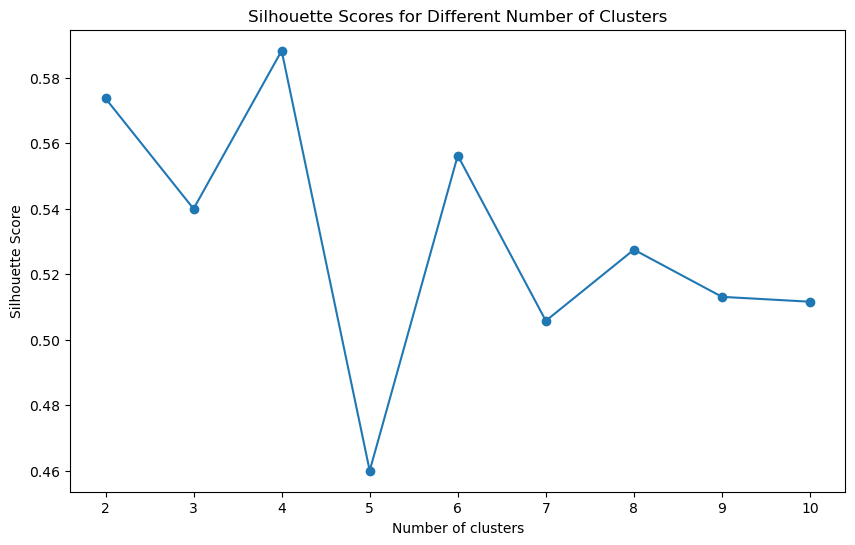

In [67]:
# normalizing receiver distance - lower values are better
shortstop_sample['norm_receiver_dist'] = 1 / (shortstop_sample['receiver_dist_from_1b']) 

# encoding bounces - False (0) is better than True (1)
shortstop_sample['bounce_encoded'] = shortstop_sample['bounce'].astype(int)

# minimizing variance in receiver_pos_y
shortstop_sample['receiver_pos_y_var'] = shortstop_sample.groupby('thrower_id')['receiver_pos_y'].transform('var')

# exchange times: We want shortstops on average with low exchange times
shortstop_sample['norm_exchange_time'] = 1 / (shortstop_sample['exchange_time'])  
shortstop_sample['norm_exchange_time'] = shortstop_sample.groupby('thrower_id')['norm_exchange_time'].transform('median')

# maximizing variance in throw_pos_x
shortstop_sample['throw_pos_x_var'] = shortstop_sample.groupby('thrower_id')['throw_pos_x'].transform('var')

shortstop_sample['result_encoded'] = shortstop_sample['batter_result'].transform(lambda x: x == 'out')
# Out will be true == 1, runner makers it will be 0
shortstop_sample['result_encoded'] = shortstop_sample['result_encoded'].astype(int)

# Selecting features for clustering
features = ['receiver_pos_y_var', 'norm_exchange_time', 'bounce_encoded', 'result_encoded']
X = shortstop_sample[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Selection - KMeans Clustering
# Finding the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores for different number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()


In [68]:
# silhouette is a measure of how similar an object is to its own cluster compared to other clusters. 
# The silhouette ranges from −1 to +1, high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
silhouette_scores

[0.5736919807466035,
 0.5399639404885879,
 0.5882470807237856,
 0.4599640169261733,
 0.5562370964021557,
 0.5057477954430556,
 0.5274831075094139,
 0.5130743475836159,
 0.5115827959666072]

- Best cluster number is 8 but that seems extreme and less interpretable than 4 so after some iteration I selected 4

In [69]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

shortstop_sample['cluster_number'] = kmeans.labels_
shortstop_sample

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,thrower_id,exchange_time,throw_pos_x,throw_pos_y,throw_velo_x,throw_velo_y,throw_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,...,end_state,batter_result,bounce,norm_receiver_dist,bounce_encoded,receiver_pos_y_var,norm_exchange_time,throw_pos_x_var,result_encoded,cluster_number
0,400,1.533,-60.116123,132.187283,60.047557,-33.596364,8.583470,56.199323,60.187776,8.202015,...,1___1,first,True,0.121921,1,3.080411,0.833333,745.208173,0,1
10,300,0.767,-38.809328,121.723080,67.698165,-32.024845,8.122797,59.852937,64.134195,3.818836,...,____3,out,False,0.261860,0,4.184868,0.937207,943.280100,1,0
16,566,1.266,-28.876506,133.288664,60.380859,-44.040563,6.340865,59.693178,63.091014,3.984381,...,____1,out,False,0.250980,0,3.318122,0.909091,814.561805,1,0
17,566,1.200,-13.826274,133.959337,54.455306,-44.599998,5.890575,60.387855,64.672500,3.411858,...,____3,out,False,0.293095,0,3.318122,0.909091,814.561805,1,0
18,337,1.100,-30.368299,122.405123,67.851009,-37.375496,9.611018,61.038196,64.043788,2.632625,...,____1,out,False,0.379849,0,1.279945,0.895852,643.518385,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,162,1.500,-8.344595,111.444145,60.054027,-40.479096,6.808510,60.530026,63.432938,3.116445,...,____3,out,False,0.320878,0,2.482890,0.833333,1070.642308,1,0
19979,688,1.000,-74.204620,120.778163,49.515626,-20.065497,14.654477,58.959909,65.401691,5.000453,...,1___0,first,False,0.199982,0,1.342839,0.881834,914.808684,0,1
19981,688,1.333,-22.959293,118.945688,61.491289,-36.729428,10.709866,61.672962,64.173875,2.037927,...,____1,out,False,0.490695,0,1.342839,0.881834,914.808684,1,0
19985,300,0.666,-57.988672,111.459545,66.241587,-23.403196,10.245850,59.839710,63.493134,3.802722,...,____2,out,False,0.262970,0,4.184868,0.937207,943.280100,1,0


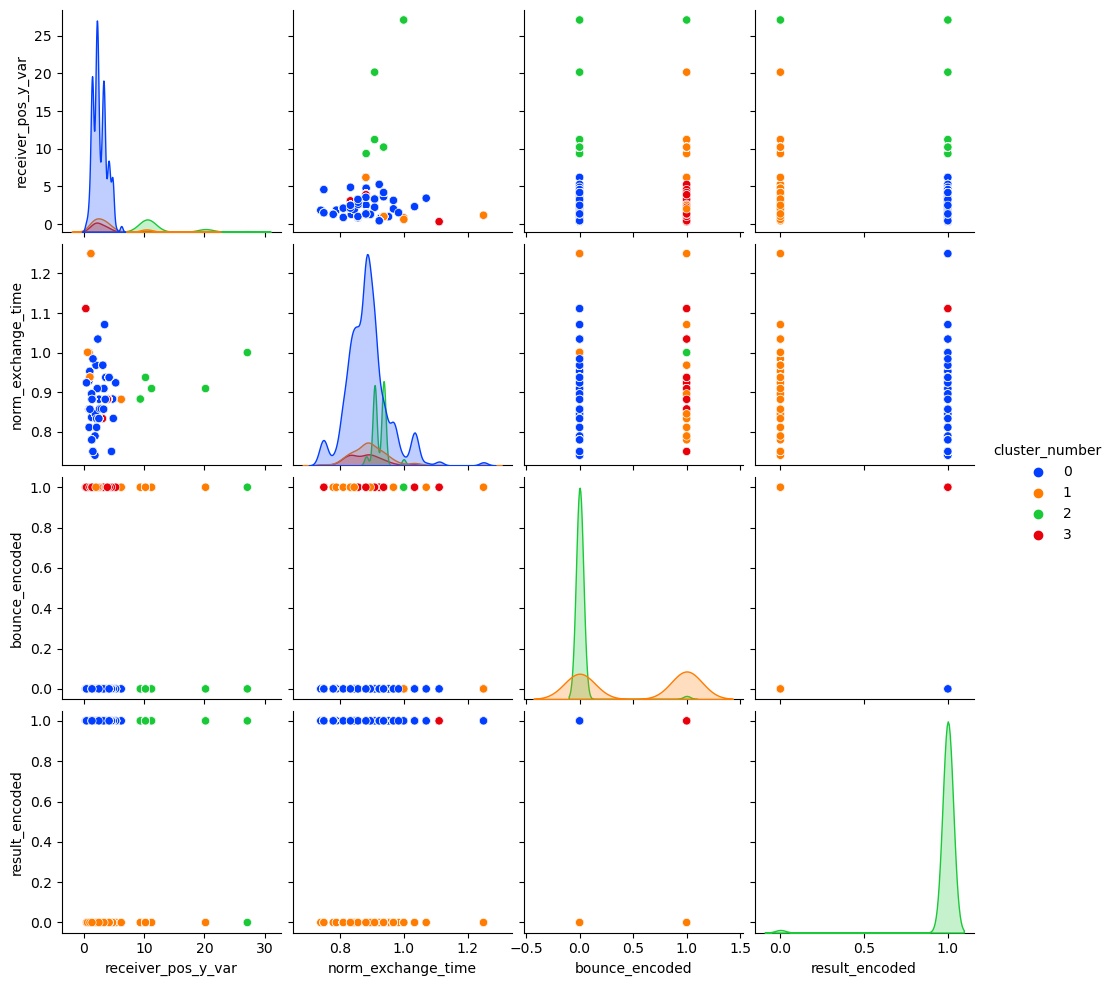

In [70]:
pairplot_features = features + ['cluster_number']
sns.pairplot(shortstop_sample[pairplot_features], hue='cluster_number', palette='bright')

- Essentially, we were able to cluster the throws from shortstop to first base into 4 categories

    0. normal accurate throws out - varied exchange times but otherwise all reached first base accurately wth minimal variance in receiver position, no bounce, and resulted in an out

    1. Safe throws - similar to above but these resulted in the runner being safe. They had a slightly higher exchange rate and bounced occasionally

    2. Wild Throws - A small subsection of the data that continuously returned as longer exchange times and higher inaccuracies

    3. Bounced and Out - all balls in this cluster bounced but still resulted in an out

### This is a great summary table below

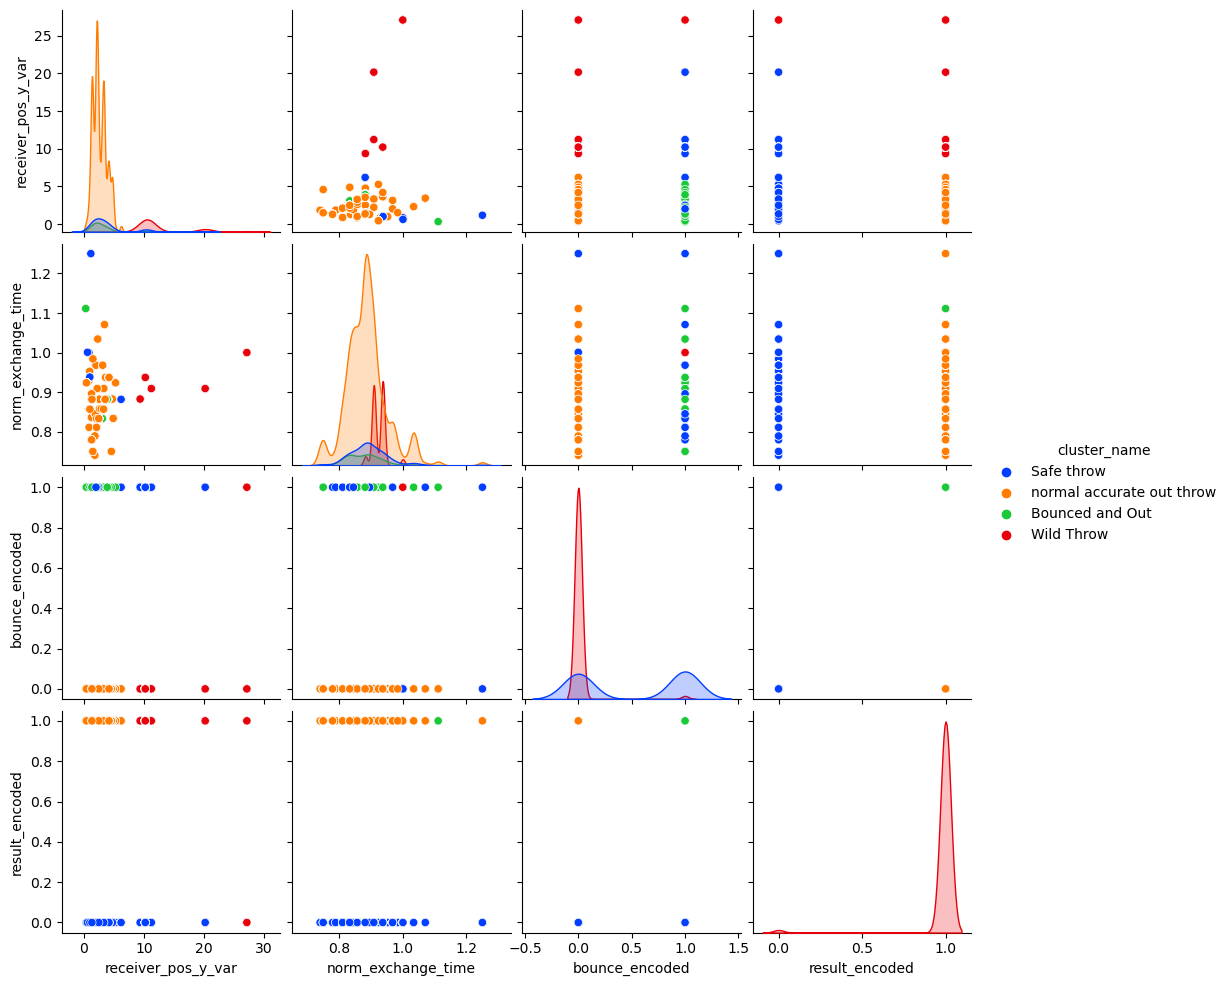

In [84]:
#mapping cluster number to name
mapper = {
    0: "normal accurate out throw",
    1: "Safe throw",
    2: "Wild Throw",
    3: "Bounced and Out"
}

shortstop_sample['cluster_name'] = shortstop_sample['cluster_number'].map(mapper)

pairplot_features = features + ['cluster_name']
sns.pairplot(shortstop_sample[pairplot_features], hue='cluster_name', palette='bright')

In [72]:
# Index up to features[:2] because we do not need the encoded boolean bounce/out for descriptive statistics
shortstop_sample.groupby(['cluster_name']).describe()[features[:2]]

receiver_pos_y_var                                 \
                                       count       mean       std       min   
cluster_name                                                                  
Bounced and Out                        284.0   2.993623  2.136047  0.315664   
Safe throw                             512.0   3.610049  2.886554  0.430863   
Wild Throw                             495.0  12.614519  4.478964  9.361676   
normal accurate out throw             4045.0   2.606630  1.129042  0.315664   

                                                                       \
                                 25%        50%        75%        max   
cluster_name                                                            
Bounced and Out             1.909548   2.264724   3.318122  11.222631   
Safe throw                  2.014294   2.895317   3.978823  20.178126   
Wild Throw                 10.217640  10.217640  11.222631  27.113086   
normal accurate out throw   1.843074   2.308284   3.318122   6.191856   

                          norm_exchange_time                                \
                                       count      mean       std       min   
cluster_name                                                                 
Bounced and Out                        284.0  0.879683  0.059608  0.750188   
Safe throw                             512.0  0.895519  0.066426  0.740577   
Wild Throw                             495.0  0.924053  0.021606  0.882613   
normal accurate out throw             4045.0  0.886761  0.065885  0.740577   

                                                                   
                                25%       50%       75%       max  
cluster_name                                                       
Bounced and Out            0.833333  0.881834  0.909091  1.111111  
Safe throw                 0.856898  0.882613  0.937207  1.250000  
Wild Throw                 0.909091  0.937207  0.937207  1.000000  
normal accurate out throw  0.845116  0.882613  0.909091  1.250000

### We can clearly some some descriptive statistical differences between the clusters the model created.

- 3 is clearly the errant throws shown by massively larger receiver_pos_y_var, one may be inclined to consider it outliers but given the fact the count of these throws is almost 2nd most I think it would be inappropriate to remove this much information. Throws like this clearly happen at a hoigh enough freqeuncy to not be considered outliers

- 0 and 2 both resulted in outs and we can see similar exchange times and similar accuracy measurements despite the cluster 2 having bounces

- 1 shows higher variance in throws to first and trivially higher exchange rate but the inaccuracies could explain the reason for them being safe

In [73]:
# Counting the number of throws for each thrower within each cluster
throws_per_thrower_cluster = shortstop_sample.groupby(['thrower_id', 'cluster_name']).size().reset_index(name='count')

# Finding the throwers with the most throws in each cluster
most_throws_per_cluster = throws_per_thrower_cluster.sort_values(by=['cluster_name','count'], ascending=[True, False]).groupby('cluster_name').head(5)

most_throws_per_cluster


,thrower_id,cluster_name,count
28,269,Bounced and Out,33
18,182,Bounced and Out,26
80,566,Bounced and Out,22
33,300,Bounced and Out,18
42,337,Bounced and Out,18
127,757,Safe throw,35
19,182,Safe throw,32
81,566,Safe throw,28
87,592,Safe throw,27
26,246,Safe throw,26


In [74]:
top_10_throwers = shortstop_sample['thrower_id'].value_counts().head(10).index
overlap = set(most_throws_per_cluster['thrower_id']).intersection(set(top_10_throwers))
print("Shortstops who have most throws and appear at highest frequencies in clusters: ", overlap)
print("There are",len(overlap), "athletes who overlap")

Shortstops who have most throws and appear at highest frequencies in clusters:  {300, 269, 592, 337, 757, 182, 566, 246}
There are 8 athletes who overlap


- Unsurprisngly, there is quite a bit of overlap between the players who simply had the most throws, and then those who appeared most in each category

- That being said there are a few that appeared in specific clusters that were not in the top throwers

In [75]:
players_to_examine = most_throws_per_cluster['thrower_id'][~most_throws_per_cluster['thrower_id'].isin(top_10_throwers)].values

print('The athletes who appear at a high frequency in the clusters but are not in the top 10 throwers are: ', players_to_examine)

most_throws_per_cluster[~most_throws_per_cluster['thrower_id'].isin(top_10_throwers)]

The athletes who appear at a high frequency in the clusters but are not in the top 10 throwers are:  [814 833 724  92]


,thrower_id,cluster_name,count
137,814,Wild Throw,143
139,833,Wild Throw,78
111,724,Wild Throw,25
9,92,Wild Throw,17


In [76]:
players_to_examine = np.append(players_to_examine, 757)
for player in players_to_examine:
    print(shortstop_sample[shortstop_sample['thrower_id']==player]['receiver_pos_y'].describe())

count    162.000000
mean      65.306603
std        3.350020
min       39.253292
25%       64.244467
50%       65.159385
75%       66.027576
max       90.675776
Name: receiver_pos_y, dtype: float64
count     81.000000
mean      64.859228
std        4.492007
min       55.440102
25%       63.817522
50%       64.230984
75%       65.210083
max      102.582979
Name: receiver_pos_y, dtype: float64
count    29.000000
mean     65.276226
std       3.059686
min      57.277552
25%      64.292760
50%      65.046042
75%      65.838426
max      76.802735
Name: receiver_pos_y, dtype: float64
count    17.000000
mean     64.316772
std       5.207023
min      44.705003
25%      64.330843
50%      64.819695
75%      66.483416
max      67.577007
Name: receiver_pos_y, dtype: float64
count    278.000000
mean      65.001523
std        3.196504
min       41.269006
25%       63.993385
50%       64.868814
75%       65.927030
max       92.713736
Name: receiver_pos_y, dtype: float64


- From viewing the descriptive statistics it seems like the reason their variance is so high may be because of a couple throws and not a consistent trend for all their throws. However it is hard to say that with certainty without any context around the players

In [77]:
# In order to accurately assign a label to the player we need to calculate proprotions

total_throws_per_cluster = shortstop_sample.groupby('cluster_name').size()
proportions = total_throws_per_cluster / total_throws_per_cluster.sum()
proportions


cluster_name
Bounced and Out              0.053223
Safe throw                   0.095952
Wild Throw                   0.092766
normal accurate out throw    0.758058
dtype: float64

In [78]:
# Group by thrower_id and cluster_number and count throws
throws_per_thrower_cluster = shortstop_sample.groupby(['thrower_id', 'cluster_name']).size().reset_index(name='count')

# Adjust the count by overall cluster proportions to mitigate skew in data
throws_per_thrower_cluster['adjusted_count'] = throws_per_thrower_cluster.apply(lambda row: row['count'] / proportions[row['cluster_name']], axis=1)
throws_per_thrower_cluster


,thrower_id,cluster_name,count,adjusted_count
0,16,Bounced and Out,8,150.309859
1,16,Safe throw,18,187.593750
2,16,normal accurate out throw,181,238.767862
3,37,Bounced and Out,1,18.788732
4,37,Safe throw,2,20.843750
...,...,...,...,...
135,814,Bounced and Out,5,93.943662
136,814,Safe throw,14,145.906250
137,814,Wild Throw,143,1541.511111
138,833,Safe throw,3,31.265625


In [82]:
#Finally, assign each player to a cluster based on the modified data

assigned_cluster_df = throws_per_thrower_cluster.sort_values(by='adjusted_count', ascending=False).groupby('thrower_id').first().reset_index()
assigned_cluster_df.rename({'cluster_name': 'athlete_grouping'}, axis=1, inplace=True)
assigned_cluster_df[['athlete_grouping', 'thrower_id']]

,athlete_grouping,thrower_id
0,normal accurate out throw,16
1,Safe throw,37
2,Bounced and Out,85
3,Wild Throw,92
4,Safe throw,116
5,Safe throw,121
6,normal accurate out throw,162
7,Bounced and Out,182
8,normal accurate out throw,188
9,normal accurate out throw,219


# Dashboard Generation

In [45]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

descriptive_state = shortstop_sample.groupby(['cluster_number']).describe()[features[:2]]

# Silhouette scores for different number of clusters
fig_line = px.line(
    x=range(2, 11), y=silhouette_scores,
    title='Silhouette Scores for Different Number of Clusters',
    labels={'x': 'Number of clusters', 'y': 'Silhouette Score'},
    markers=True
)

fig1 = px.scatter(
    shortstop_sample, 
    x='norm_exchange_time', 
    y='receiver_pos_y_var', 
    color='cluster_number',
    title='Scatter Plot of norm_exchange_time vs receiver_pos_y_var'
)

fig2 = px.scatter(
    shortstop_sample, 
    x='bounce_encoded', 
    y='receiver_pos_y_var', 
    color='cluster_number',
    title='Scatter Plot of bounce_encoded vs receiver_pos_y_var'
)

fig2 = px.scatter(
    shortstop_sample, 
    x='result_encoded', 
    y='receiver_pos_y_var', 
    color='cluster_number',
    title='Scatter Plot of result_encoded vs receiver_pos_y_var'
)

app = dash.Dash(__name__)


######## Need to mapn the clusters to a label for readability #######

##### Do some styling and formatting #####

# Define the layout of the app
app.layout = html.Div([
    html.H1("Kansas City Royals Shortstops - Clustering Analysis and Talent Assessment"),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    html.H2("Player Clusters"),
    html.Pre(assigned_cluster_df.to_string()),
    html.H2("Descriptive Statistics for Features by Cluster"),
    html.Pre(descriptive_state.to_string())  
])

app.run(jupyter_mode="external")



Dash app running on http://127.0.0.1:8050/


- I ended up using a powerpoint but to show I could have created a Dash dashboard as well

## Final Thoughts

- I think it is a pretty tall order to try and figure out more "talented" players from this type of data, it is by no means a trivial assignment and seems like there were issues with most of my implementation ideas

- I decided on an unsupervised approach that clustered together the raw individual throw data and aggregated the features I believe were most relevant to a successful shortstop (from the given parameters).

- I neglected a feature like velocity because I am an outcome driven sport scientist and analyst, a person who throws really hard but is consistently inaccurate is useless.

- Instead I chose for elements like their exchange time, their accuracy (for which receiver position y was a proxy), bounces, and play outcome

- There is a data granularity issue in my analysis. I combined aggregated metrics (receiver position and exhcnage time) with individual throw characteristics like the result of the throw or whether it bounced, which created a mixed level of data granularity, this will lead to problems and should be fixed in a real situation.

- I would go back and fix this but I am running low on time and believe I have satisfactorily demonstrated my knowledge and workflow. 

- Again, with no context or labels, and the the problematic skew, I beleive there are dozens of ways people could approach this and hopefully my work has been adequate